In [8]:
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt, warnings
warnings.filterwarnings('ignore')


In [6]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_folder):
    # Ensure the extraction folder exists
    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified folder
        zip_ref.extractall(extract_to_folder)
        print(f"Extracted all files to {extract_to_folder}")



In [9]:
import os 
if os.path.exists('content/index.csv'):
    coffee_df=pd.read_csv('content/index.csv')
    coffee_df
else:
    if os.path.exists('coffee-sales.zip'):
        unzip_file('coffee-sales.zip','content/')
    else:
        !kaggle datasets download -d ihelon/coffee-sales
        unzip_file('coffee-sales.zip','content/')
    coffee_df=pd.read_csv('content/index.csv')
    coffee_df



In [10]:
#as we already have the datetime column we are now dropping the date column
coffee_df.drop('date',axis=1,inplace=True)
coffee_df.head()

,datetime,cash_type,card,money,coffee_name
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [11]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     1395 non-null   object 
 1   cash_type    1395 non-null   object 
 2   card         1306 non-null   object 
 3   money        1395 non-null   float64
 4   coffee_name  1395 non-null   object 
dtypes: float64(1), object(4)
memory usage: 54.6+ KB


In [12]:
coffee_df['datetime']=pd.to_datetime(coffee_df['datetime'])
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     1395 non-null   datetime64[ns]
 1   cash_type    1395 non-null   object        
 2   card         1306 non-null   object        
 3   money        1395 non-null   float64       
 4   coffee_name  1395 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 54.6+ KB


In [13]:
coffee_df.isna().sum()
coffee_df.dropna(inplace=True)

In [14]:
coffee_df['day']=coffee_df['datetime'].dt.day
coffee_df['month']=coffee_df['datetime'].dt.month
coffee_df['year']=coffee_df['datetime'].dt.year
coffee_df['hour']=coffee_df['datetime'].dt.hour
coffee_df['minute']=coffee_df['datetime'].dt.minute
coffee_df['second']=coffee_df['datetime'].dt.second
coffee_df['weekday']=coffee_df['datetime'].dt.weekday.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
coffee_df

,datetime,cash_type,card,money,coffee_name,day,month,year,hour,minute,second,weekday
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,1,3,2024,10,15,50,Friday
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,19,22,Friday
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,20,18,Friday
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,1,3,2024,13,46,33,Friday
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,1,3,2024,13,48,14,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2024-08-27 10:04:04.563,card,ANON-0000-0000-0375,32.82,Latte,27,8,2024,10,4,4,Tuesday
1391,2024-08-28 12:08:18.772,card,ANON-0000-0000-0551,27.92,Americano with Milk,28,8,2024,12,8,18,Wednesday
1392,2024-08-28 12:10:04.139,card,ANON-0000-0000-0551,32.82,Cappuccino,28,8,2024,12,10,4,Wednesday
1393,2024-08-28 12:35:06.944,card,ANON-0000-0000-0375,23.02,Americano,28,8,2024,12,35,6,Wednesday


## Time Series Exploratory Data Analysis

In [15]:
coffee_df.set_index('datetime',inplace=True)


In [16]:
coffee_df.sample(3)

,cash_type,card,money,coffee_name,day,month,year,hour,minute,second,weekday
datetime,,,,,,,,,,,
2024-03-05 14:34:55.963,card,ANON-0000-0000-0023,38.70,Latte,5,3,2024,14,34,55,Tuesday
2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte,31,7,2024,21,55,16,Wednesday
2024-06-08 09:04:20.016,card,ANON-0000-0000-0271,27.92,Cortado,8,6,2024,9,4,20,Saturday


Weekly Coffee Sales Trends
* Create a graph that depicts the sales trends based on the day of the week 

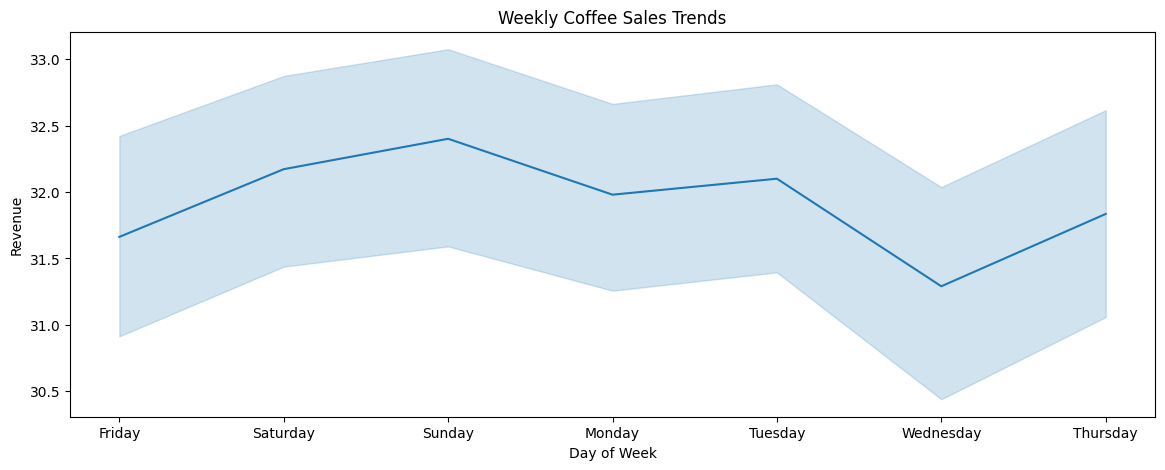

In [17]:
plt.figure(figsize=(14,5))
sns.lineplot(data=coffee_df,y='money',x='weekday')
plt.ylabel('Revenue')
plt.xlabel('Day of Week')
plt.xticks(coffee_df['weekday'].unique())
plt.title('Weekly Coffee Sales Trends')
plt.show()

Conclusion:
from the above graph we can conclude that 
- Least revenue is generated on 'Wednesday'
- Highest revenue is generated by 'Sunday'

Sales Comparison Across Different Coffee Types
* Create a graph that depicts the sales trends based on the Different Coffee types

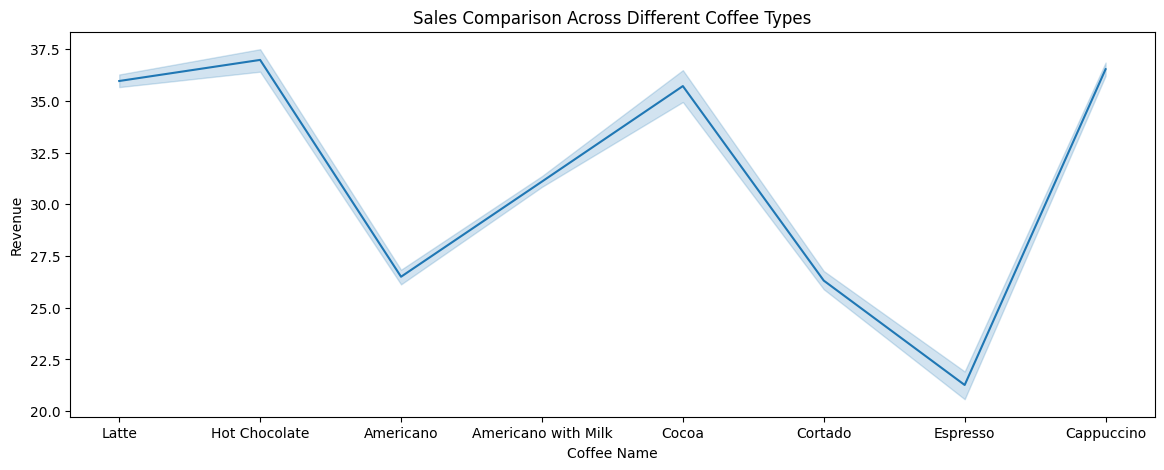

In [18]:
plt.figure(figsize=(14,5))
sns.lineplot(data=coffee_df,y='money',x='coffee_name')
plt.ylabel('Revenue')
plt.xlabel('Coffee Name')
plt.xticks(coffee_df['coffee_name'].unique())
plt.title('Sales Comparison Across Different Coffee Types')
plt.show()

Conclusion:
from the above graph we can conclude that 
- Least revenue is generated by 'Express'
- Highest revenue is generated by 'Hot Chocolate'

Monthly Coffee Sales Trends
* Create a graph that depicts the sales trends based on the month

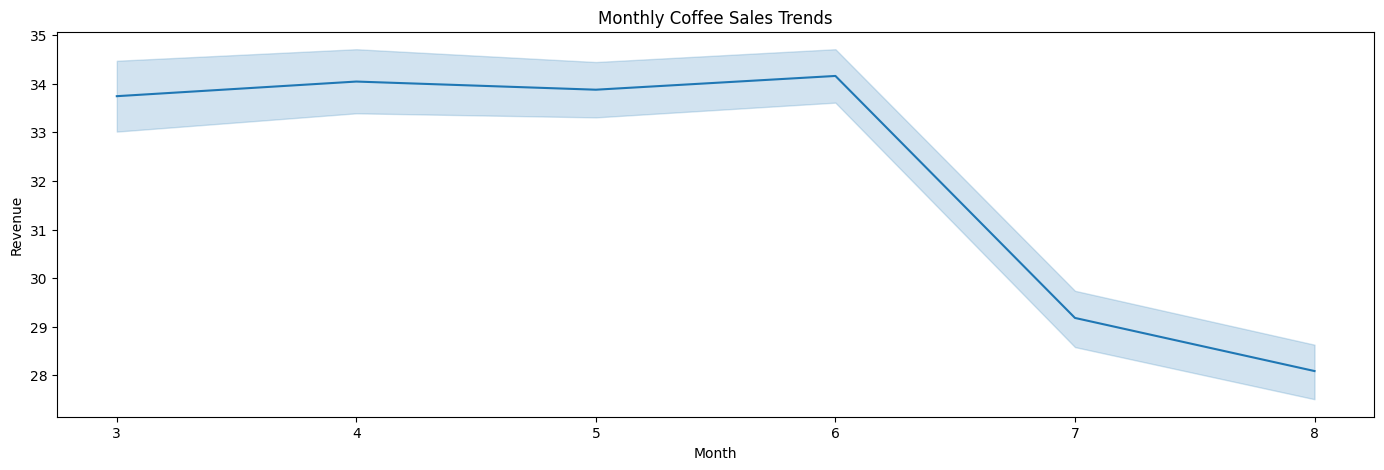

In [19]:
plt.figure(figsize=(17,5))
sns.lineplot(data=coffee_df,y='money',x='month')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(coffee_df['month'].unique())
plt.title('Monthly Coffee Sales Trends')
plt.show()

Conclusion:
from the above graph we can conclude that 
- Least revenue is generated in 'August'
- Highest revenue is generated in 'June'

Peak Sales Hours for Coffee
* Create a graph that depicts the sales trends based on the hour 

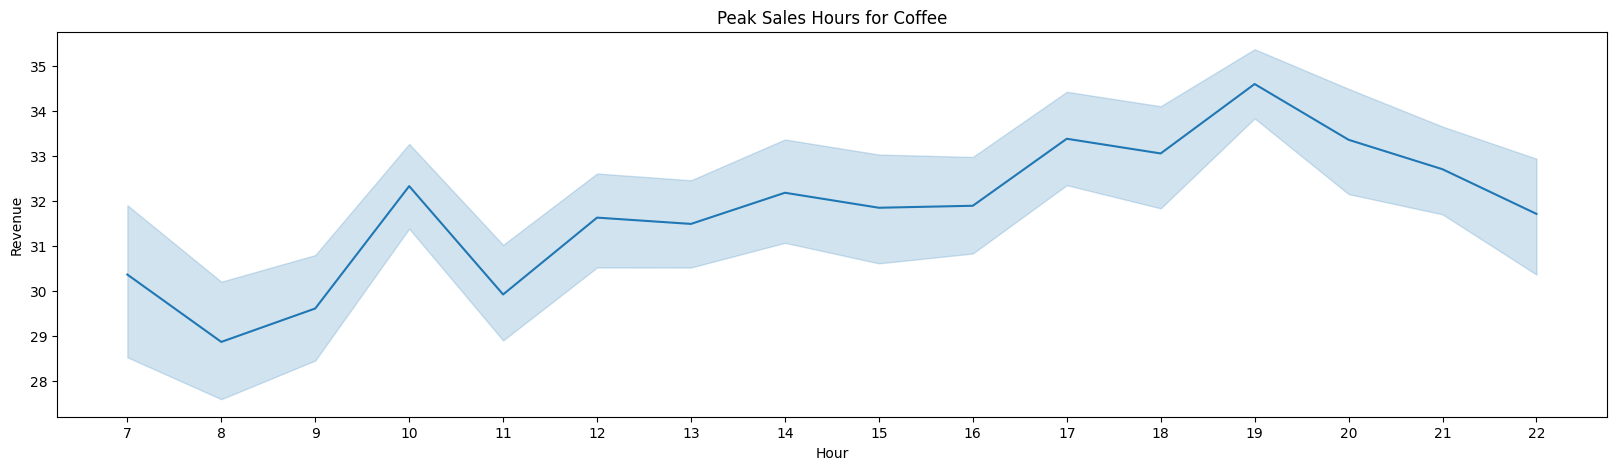

In [20]:
plt.figure(figsize=(20,5))
sns.lineplot(data=coffee_df,y='money',x='hour')
plt.ylabel('Revenue')
plt.xlabel('Hour')
plt.title('Peak Sales Hours for Coffee')
plt.xticks(coffee_df['hour'].unique())
plt.show()

Conclusion:
from the above graph we can conclude that 
- Least revenue is generated at '19:00' or '7:00 PM'
- Highest revenue is generated at '8:00' or '8:00 AM'

# Next day/week/month sales

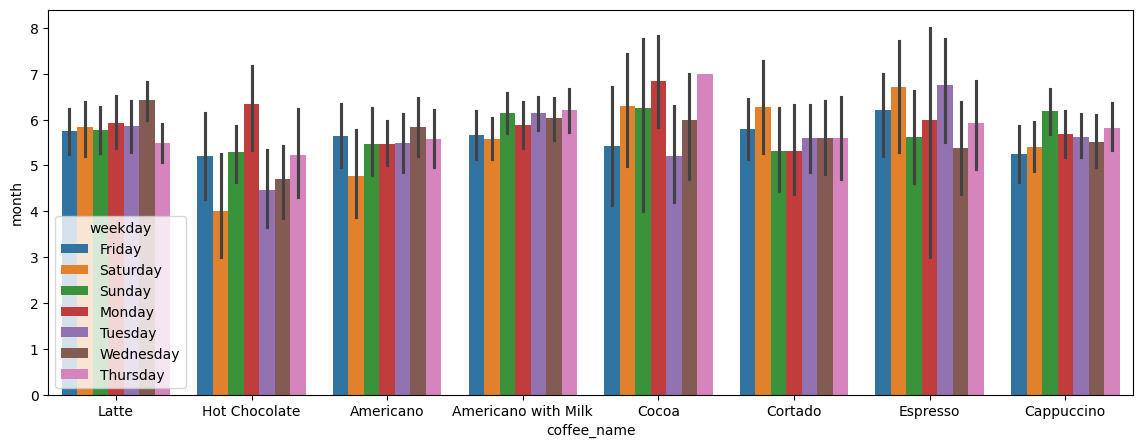

In [22]:
plt.figure(figsize=(14,5))
sns.barplot(data=coffee_df,y='month',x='coffee_name',hue='weekday')

plt.show()

In [23]:
#daily sales report
daily_sales=coffee_df.groupby(['coffee_name','day',])['weekday'].count()
daily_sales


coffee_name  day
Americano    1       4
             2       7
             3       2
             4       1
             5       6
                    ..
Latte        27      6
             28      6
             29      7
             30     12
             31     11
Name: weekday, Length: 227, dtype: int64

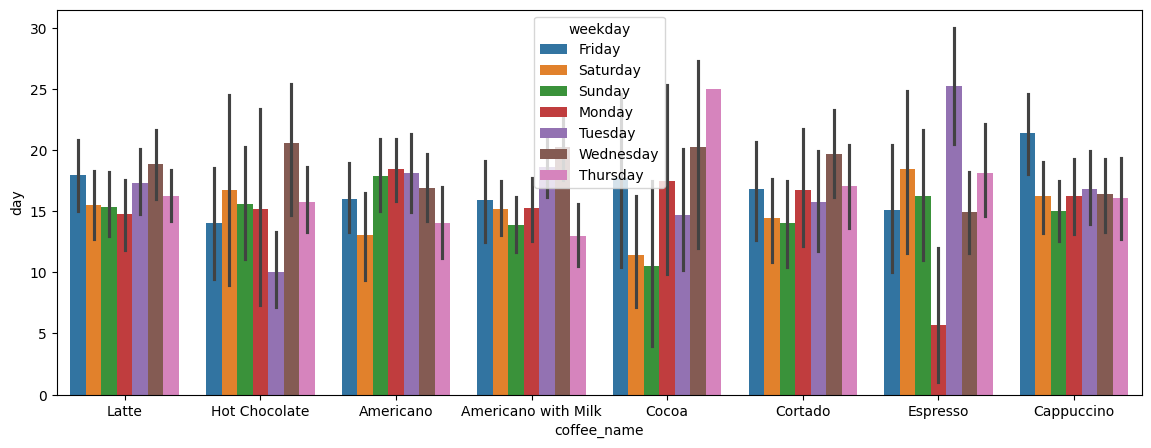

In [24]:
plt.figure(figsize=(14,5))
sns.barplot(data=coffee_df,y='day',x='coffee_name',hue='weekday')

plt.show()

# Specific customer purchases